# IMPORTING MODULES AND VARIABLE DEFINITION

Import Statements for importing all the module and the python files which we have created for our project.

Define a variable for image size for the image which we will be giving to the model (after preprocessing)

Define a variable for the total number of classes (Traffic Signs) that we have to classify.


In [1]:
from keras.utils import np_utils
import numpy as np
from random import randint
from keras.callbacks import ModelCheckpoint  
import glob
from IPython.core.display import display, Image
from matplotlib import pyplot
from sklearn.utils import class_weight
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')


from helpers.preprocessImage import *
from helpers.imageDetails import randomImageDetails
from helpers.classDetails import datasetDetails
from helpers.classLabels import loadClassLabelsMapAndList
from helpers.simpleCNN import get_simple_cnn_model
from helpers.lenetModel import get_lenet_model
from helpers.modifiedLenet import get_modified_lenet_model
from helpers.modelPerformance import show_models_performance
from helpers.testImages import detect_image_type_lenet_model
from helpers.stratify import get_stratified_dataset


#Incoming image size after preprocessing - we resize the image to be of size 32x32
IMAGE_SIZE = 32

#Total class labels for the dataset
TOTAL_CLASSES = 43

Using TensorFlow backend.


# **PREPROCESSING DATA**
Read and preprocess all the images from folder ./GTSRB/Final_Training/Images.

These images are from the training dataset. The readPreprocessedTrainTrafficSigns method reads the images from the folders and their corresponding labels from the csv files. It then processes the images and stores in the images in an array. 

Lastly, the method returns preprocessed train images array and an array of corresponsing labels for each image.

We then convert the images array to a numpy array.
We also perform one hot encoding for the labels array and store it in labels.

In [2]:
images_arr, labels_arr = readPreprocessedTrainTrafficSigns('./GTSRB/Final_Training/Images', IMAGE_SIZE)
images = np.array(images_arr, dtype='float32')
labels = np_utils.to_categorical(np.array(labels_arr), 43)

*******

Read and preprocess all the images from folder ./GTSRB/Final_Test/Images.

These images are from the testing dataset. The readPreprocessedTestTrafficSigns method reads the images from the folders and their corresponding labels from the csv files. It then processes the images and stores in the images in an array. 

Lastly, the method returns preprocessed test images array and an array of corresponsing labels for each image.

We then convert the test images array and test labels array to a numpy array.


In [3]:
test_images_arr, test_labels_arr = readPreprocessedTestTrafficSigns('./GTSRB/Final_Test/Images', IMAGE_SIZE)
test_images = np.array(test_images_arr, dtype='float32')
test_labels = np.array(test_labels_arr)

# **DISPLAYING IMAGE DETAILS**

**TRAIN DATASET**

Let's print the details of any image from the training dataset. We have a method called randomImageDetails.
This method takes some random number within the length of the images array (index for the train images array) and prints out details of the image.

For example - If random_number = 5, we print out the details of the 5th image from the train images array and labels array.


The image 8272 is: 
[[[ 0.21113184  0.21029459  0.21233572 ...,  0.74138349  0.70878738
    0.79364097]
  [ 0.21766734  0.19957784  0.17807133 ...,  0.68432212  0.70918226
    0.66648346]
  [ 0.19566247  0.21924214  0.18034428 ...,  0.66862005  0.7921378
    0.72526491]
  ..., 
  [ 0.14166875  0.03965906  0.01205688 ...,  0.73304504  0.82815754
    0.85547501]
  [ 0.06262078  0.036604    0.00473145 ...,  0.37369236  0.54923964
    0.5646854 ]
  [ 0.00976379  0.03285702  0.00174055 ...,  0.24750243  0.30574062
    0.3145597 ]]

 [[ 0.21632718  0.20766592  0.20730314 ...,  0.76573873  0.67369944
    0.74466276]
  [ 0.22029655  0.19957784  0.17584676 ...,  0.69382328  0.68428481
    0.67633337]
  [ 0.19566247  0.21402122  0.16678594 ...,  0.67509431  0.76778984
    0.67375737]
  ..., 
  [ 0.14166875  0.03965906  0.01205688 ...,  0.74381125  0.78851128
    0.86838514]
  [ 0.06417878  0.036604    0.00464844 ...,  0.3965621   0.54232568
    0.56131947]
  [ 0.00976379  0.03342788  0.00170832

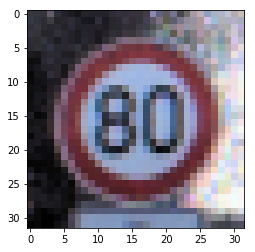

In [4]:
"""
Picking a random TRAIN image and printing its details -
1. Printing the image array
2. Printing the image shape
3. Printing the total rows and columns in the image
4. Printing the label for the image

We also plot the processed image
"""
random_number = randint(0, len(images))
randomImageDetails(random_number, images, labels_arr)

****




**TEST DATASET**

Let's print the details of any image from the testing dataset. This is similar to the code cell above except this is for the testing dataset.

For example - If random_number = 5, we print out the details of the 5th image from the test images array and labels array.

In [5]:
"""
Picking a random TEST image and printing its details -
1. Printing the image array
2. Printing the image shape
3. Printing the total rows and columns in the image
4. Printing the label for the image

We also plot the processed image
"""

random_number = randint(0, len(test_images))
randomImageDetails(random_number, test_images, test_labels_arr)


The image 5983 is: 
[[[ 0.01017033  0.01278553  0.04489349 ...,  0.7142787   0.74254823
    0.79493797]
  [ 0.05242205  0.02625098  0.0142867  ...,  0.76394081  0.76810193
    0.7980321 ]
  [ 0.03818803  0.05072714  0.03832281 ...,  0.67467707  0.72484541
    0.77888793]
  ..., 
  [ 0.51136333  0.16362011  0.17644881 ...,  0.32966179  0.19606304
    0.12287743]
  [ 0.34456098  0.14214157  0.17536342 ...,  0.23033522  0.2718485
    0.19251372]
  [ 0.31549436  0.10376801  0.15285155 ...,  0.23909692  0.27865496
    0.2408952 ]]

 [[ 0.00910104  0.01185582  0.03850999 ...,  0.77454603  0.7948814
    0.86241096]
  [ 0.04615184  0.02450099  0.01417802 ...,  0.7843523   0.7872448
    0.84248596]
  [ 0.03502806  0.04601847  0.0361104  ...,  0.69560415  0.74905968
    0.81493843]
  ..., 
  [ 0.43629685  0.14701109  0.1524263  ...,  0.31668037  0.20038211
    0.12503855]
  [ 0.31511676  0.13063255  0.15377177 ...,  0.22425021  0.28454405
    0.20434858]
  [ 0.28411037  0.0982257   0.14187191 .

# ANALYSING THE DATASET

Let's analyse the dataset. We will first be mapping some meaningful traffic sign names for each class ID. 

We use the following link to get some meaningful names for each kind of traffic sign image - http://www.gettingaroundgermany.info/zeichen.shtml

After mapping this, we display a graph of the frequency of images for each class ID i.e. we find how many images do we have for each class label. 

Since, the number of images for each class are not the same, we have an imbalanced dataset. The graph displays an imbalanced dataset.

We also print out the frequency of images for each class, the class with the highest frequency and the class with the lowest frequency.

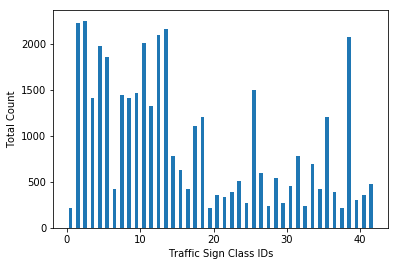

Class 2 has the highest frequency and the frequency is 2250
Class 0 has the lowest frequency and the frequency is 210
******* Printing Class ID, Class Label and Frequency Mapping *******
Class ID 0 - ”Speed Limit 20” - Frequency 210
Class ID 1 - ”Speed Limit 30” - Frequency 2220
Class ID 2 - ”Speed Limit 50” - Frequency 2250
Class ID 3 - ”Speed Limit 60” - Frequency 1410
Class ID 4 - ”Speed Limit 70” - Frequency 1980
Class ID 5 - ”Speed Limit 80” - Frequency 1860
Class ID 6 - ”End of speed limit 80” - Frequency 420
Class ID 7 - ”Speed Limit 100” - Frequency 1440
Class ID 8 - ”Speed Limit 120” - Frequency 1410
Class ID 9 - ”No Passing” - Frequency 1470
Class ID 10 - ”No Passing for vehicles over 3.5t” - Frequency 2010
Class ID 11 - ”Priority” - Frequency 1320
Class ID 12 - ”Priority Road” - Frequency 2100
Class ID 13 - ”Yield” - Frequency 2160
Class ID 14 - ”Stop” - Frequency 780
Class ID 15 - ”Road Closed” - Frequency 630
Class ID 16 - ”Vehicles over 3.5t prohibited” - Frequency 420
Cl

In [6]:
#Loading the mapping between class IDs and labels
class_labels_list = loadClassLabelsMapAndList('./GTSRB')

#Visualizing the class labels frequency. 
#Also, prints the frequency for each class ID.
datasetDetails(labels_arr, TOTAL_CLASSES, class_labels_list)


# SIMPLE CNN MODEL

Let's first try training a simple CNN model using our preprocessed images.

We use the test_train_split method to split the dataset into train and validation set. 80% images are used for training and 20% are used for validation. We will not be using data augmentation for this model.

We increased the number of filters  with every convolutional layer which in turn increases the depth of every convolutional layer. 

We alternated every convolutional layer with a max pooling layer. Pooling layers are used to reduce the spatial size of the representation to reduce the amount of parameters and computation. 

I also added a global average pooling layer. This will reduce the 3D array to a vector without losing any information.

The last layer is the output layer (dense layer) and it has 43 nodes (as there are 43 types of traffic signs).

We will also print out the model's performance using our method called show_models_performance.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 16, 16)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 8, 8)         131328    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 256, 4, 4)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
__________

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


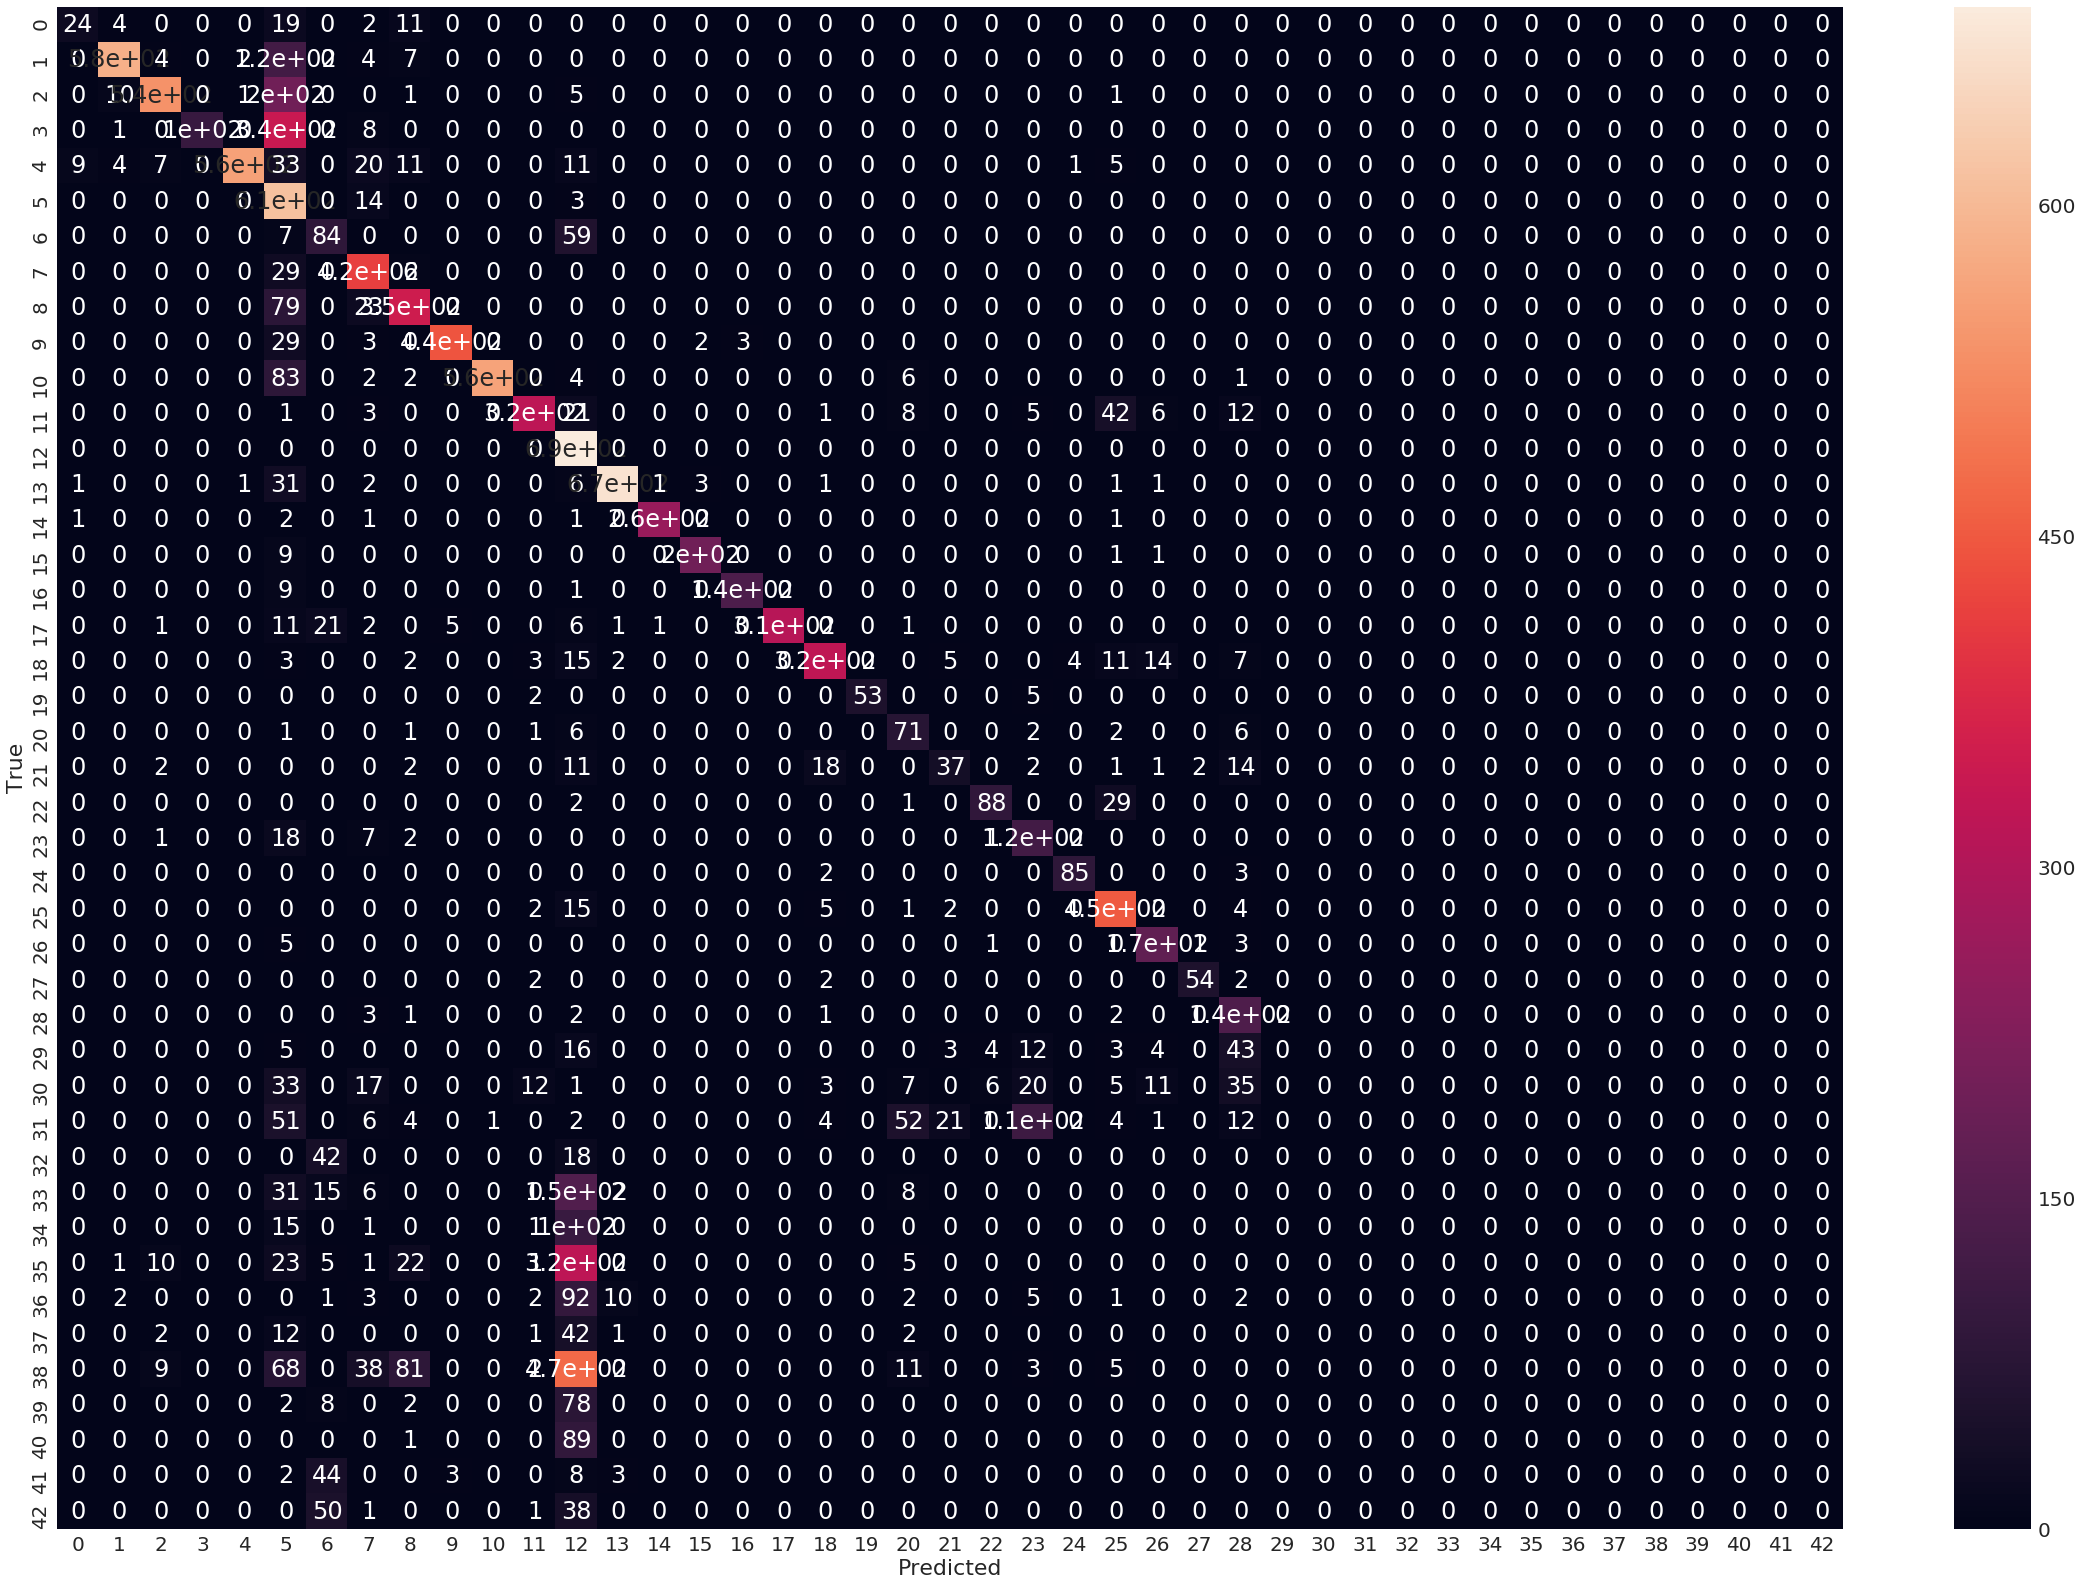

In [7]:
#Simple CNN model without data augmentation and without stratified data split

simple_model = get_simple_cnn_model(IMAGE_SIZE)
simple_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_simple_cnn.hdf5', verbose=1, save_best_only=True)
simple_model_history = simple_model.fit(images, labels, validation_split=0.2, shuffle=True, epochs=15, batch_size=32, callbacks=[checkpointer], verbose=1)
simple_cnn_y_pred = simple_model.predict_classes(test_images)
show_models_performance(test_labels, simple_cnn_y_pred, TOTAL_CLASSES)

We can see the performance of our model on the validation set. We provide only 15 epochs for training. We see that the validation loss does not improve and hence, we stopped the training of the model.

We have printed the model summary. 

Since, our dataset is imbalanced, accuracy is not the best metric to use for finding out how our model is performing. We will see the performance of our model using precision, recall and F-beta score. We will use the weighted average version of the method precision_recall_fscore_support. 

We print out the classification report for the model.

Confusion matrix is calculated using the confusion_matrix method of sklearn.metrics. We use matplotlib and seaborn modules to plot the confusion matrix. 


**PLOTTING LOSS VS EPOCHS**

We have displayed a plot of loss on training and validation datasets over training epochs for simple CNN model.

In [8]:
#Plot Loss values for training and validation
pyplot.plot(simple_model_history.history['loss'])
pyplot.plot(simple_model_history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.show()

**SIMPLE CNN MODEL PERFORMANCE ON IMAGES FROM THE WEB**

Now, let's see how our simple CNN models performs on randomly selected images from the web. 

Our detect_image_type_lenet_model prints out  the prediction for the input image.

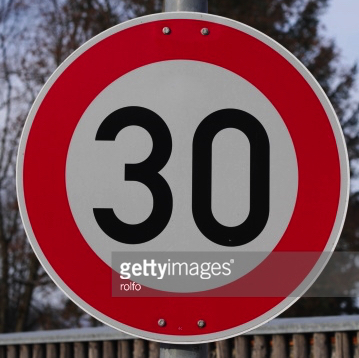

The predicted traffic sign is ”Speed Limit 30”


The predicted traffic sign is ”No Passing”


The predicted traffic sign is ”Watch for Children”


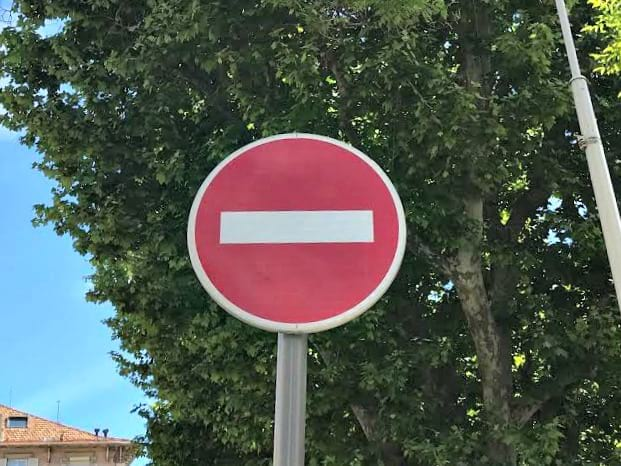

The predicted traffic sign is ”Speed Limit 50”


The predicted traffic sign is ”Priority Road”


The predicted traffic sign is ”Do Not Enter”


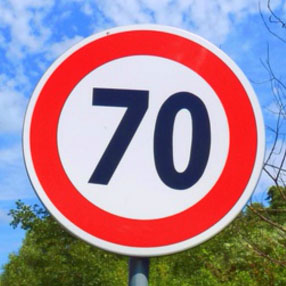

The predicted traffic sign is ”Speed Limit 120”


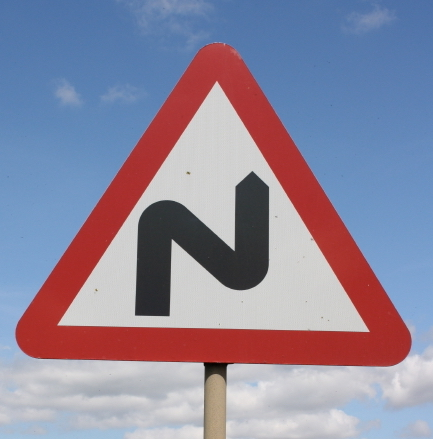

The predicted traffic sign is ”Watch for Children”


The predicted traffic sign is ”Road Work”


The predicted traffic sign is ”Speed Limit 120”


The predicted traffic sign is ”Road Work”


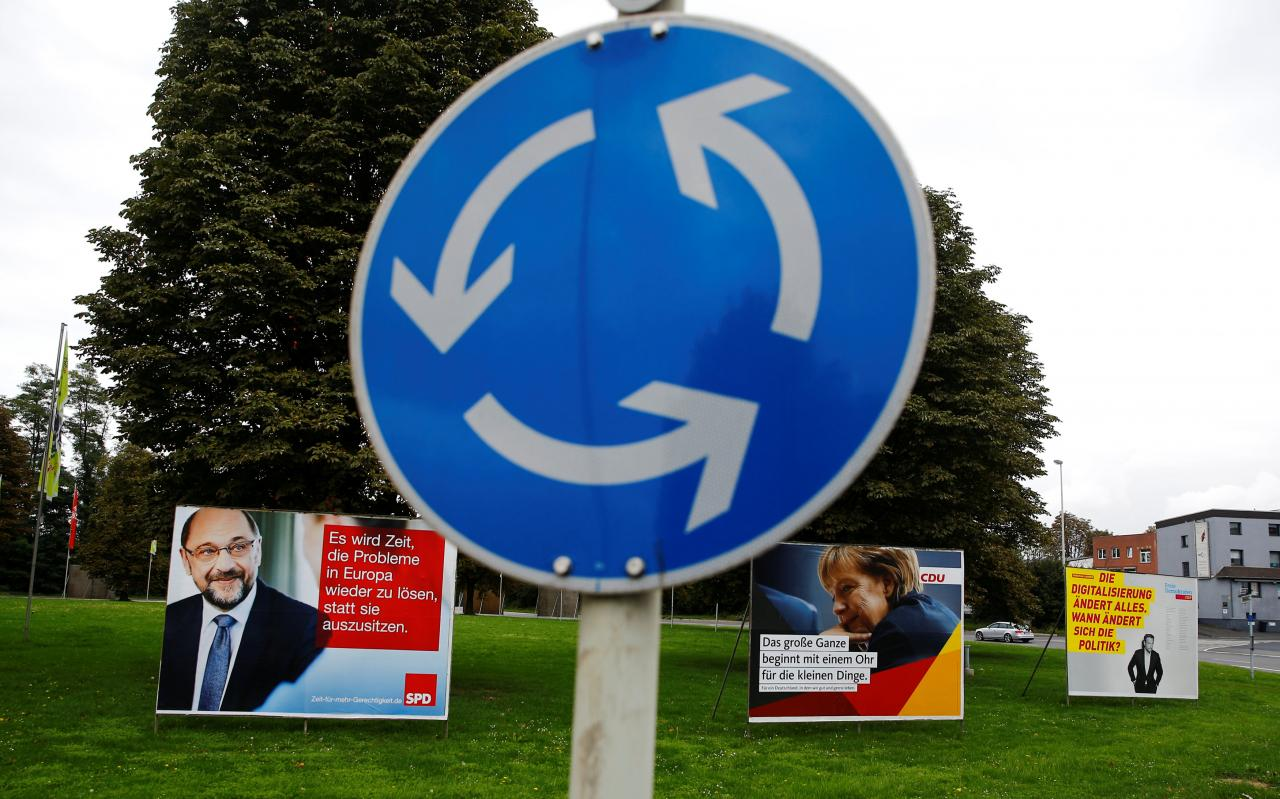

The predicted traffic sign is ”Priority Road”


The predicted traffic sign is ”Priority Road”


The predicted traffic sign is ”Priority Road”


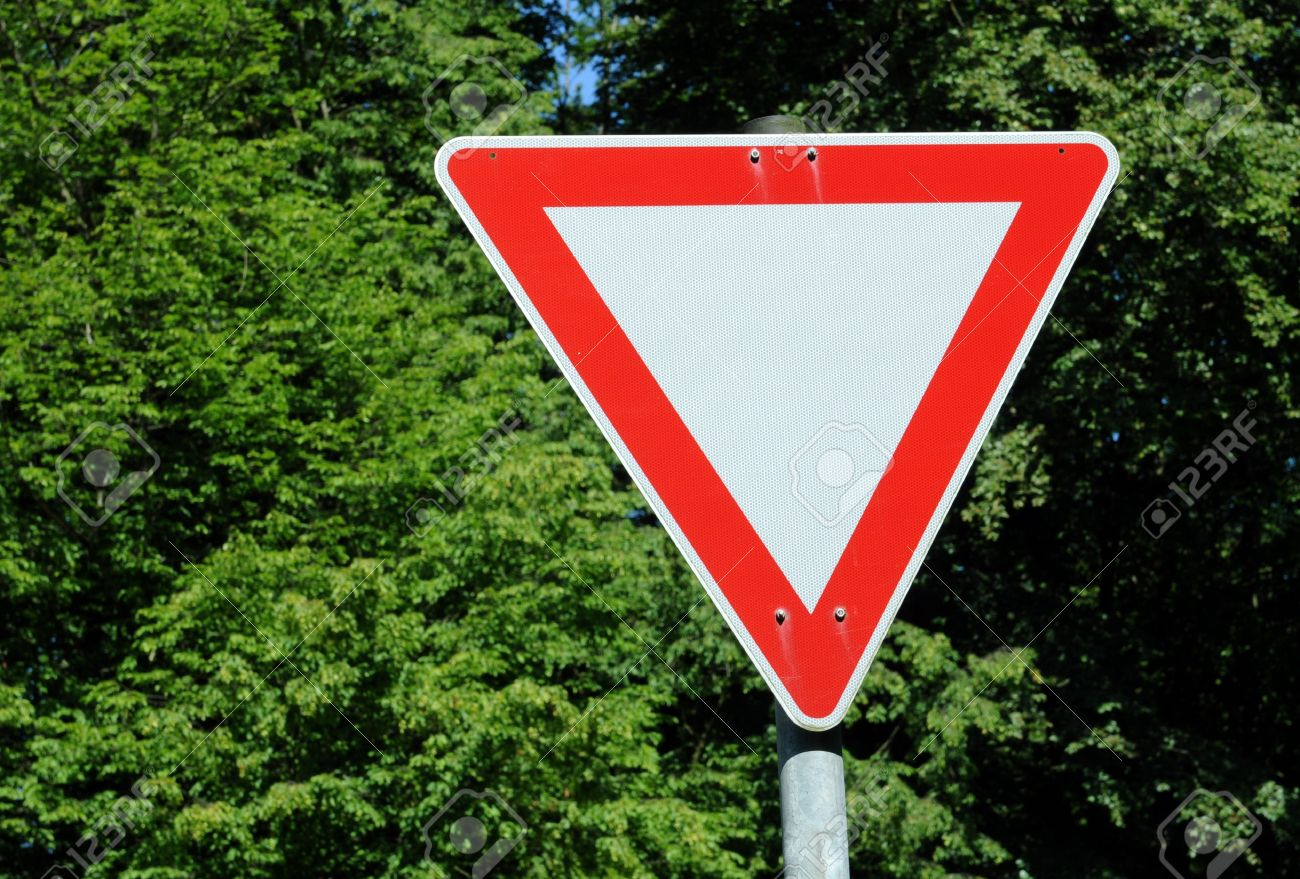

The predicted traffic sign is ”Yield”


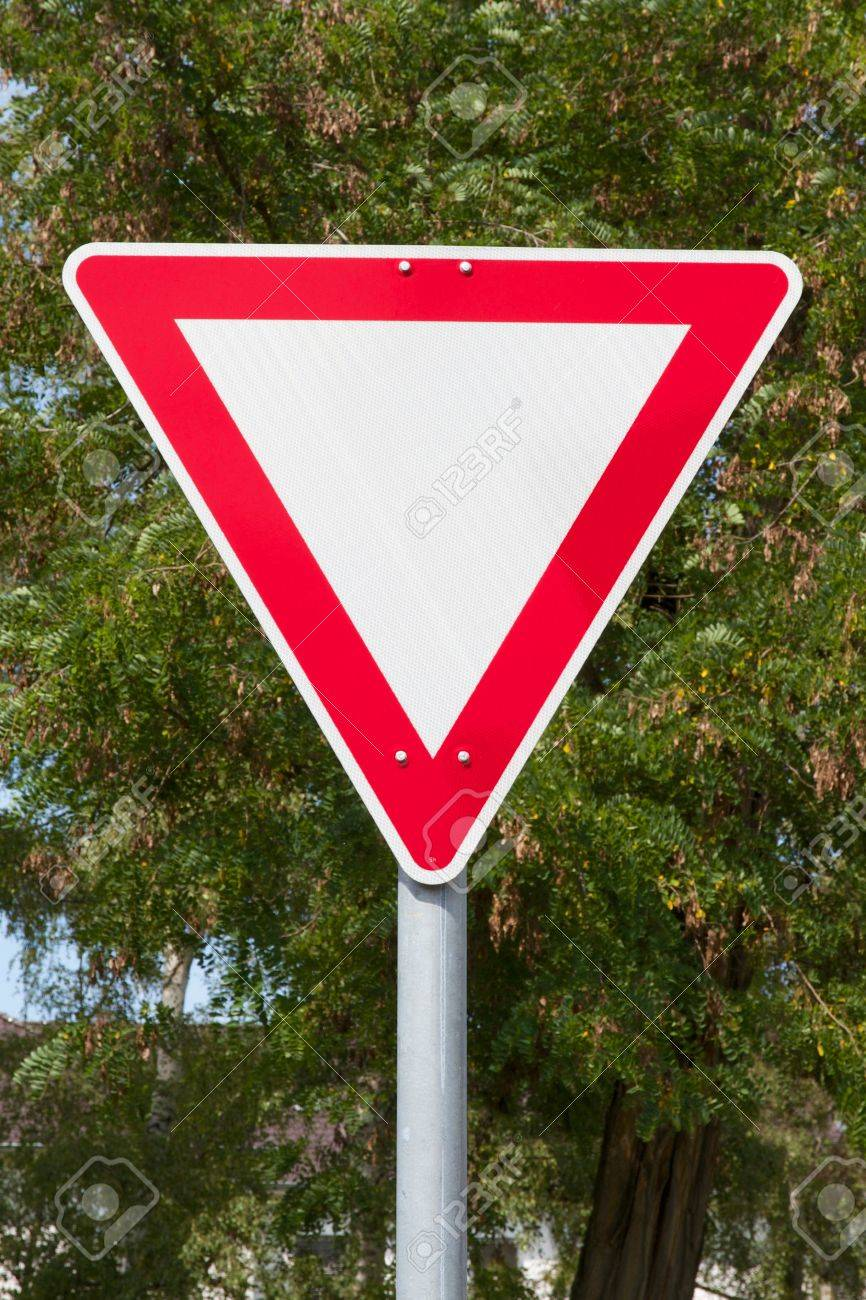

The predicted traffic sign is ”Yield”


In [9]:
img_list = sorted(glob.glob("./test_traffic_sign_images/*"))
    
for img_path in img_list:
    display_img = Image(img_path, width=175, height=175)
    display(display_img)
    detect_image_type_lenet_model(simple_model, img_path, class_labels_list, IMAGE_SIZE)


You can see that the simple CNN model does not perform so well on the images picked up from the web. It correctly classifies only 8 out of 16 images that we provide. It correctly classifies 50% of the images we provide. 

The model is clearly underfitting. So, we try to improve it ahead by different techniques.

# LENET-5 MODELS

We will now be trying the Lenet-5 model and the modified Lenet-5 model. 

**COMMON FUNCTION CALLS FOR THE MODELS**

The function calls below are some common function calls made for both the models that we will be training.

We have a method called get_stratified_dataset which in turn calls the StratifiedShuffleSplit of sklearn. Since, our dataset is imbalanced, this method will help us create a train validation dataset which is equally balanced in terms of the classes.

In addition, we will also use class weights when we fit the model. When our model comes across a training image from the class which has less samples, our model will pay more attention when calculating the loss. 
We calculate the class weights by using the compute_class_weights method of the sklearn.utils module.


In [13]:
X_train, Y_train, X_val, Y_val = get_stratified_dataset(images, labels)

class_weights = class_weight.compute_class_weight('balanced', np.unique(labels_arr), labels_arr)
print("Class weights are: {}".format(class_weights))

Class weights are: [ 4.34208195  0.41073748  0.40526098  0.64669306  0.46052384  0.49023506
  2.17104097  0.63322028  0.64669306  0.62029742  0.45365035  0.69078576
  0.43420819  0.42214686  1.16902206  1.44736065  2.17104097  0.82147496
  0.75986434  4.34208195  2.53288114  2.76314306  2.33804413  1.7879161
  3.37717485  0.60789147  1.51972868  3.79932171  1.68858742  3.37717485
  2.02630491  1.16902206  3.79932171  1.3234212   2.17104097  0.75986434
  2.33804413  4.34208195  0.44050107  3.03945736  2.53288114  3.79932171
  3.79932171]


**LENET-5 MODEL - COMPILE AND FIT THE MODEL**

We are now trying out the Lenet-5 model for the dataset. 

We will be using the ImageDataGenerator method to do data augmentation. 

We print out the summary of the Lenet-5 model. 

We will be training it for only 25 epochs, as we have noticed that the validation loss does not improve after that. So, we stop the training after 25 epochs else the model will start overfitting.

You can notice that we have used the train set and validation set which we created in the above code cell using StratifiedShuffleSplit.

We will be using the SGD optimizer as it has better generalization than adaptive optimizers. We are using a decreasing learning rate with SGD. The learning rate decreases with every epoch. This helps us take smaller steps towards the solution. As we go closer to the solution, we want to take smaller steps towards it so that we do not jump over the solution. 

In [14]:
lr = 0.01
lenet_sgd_optimizer = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

def learning_rate_scheduler(epoch):
    return lr*(0.1**int(epoch/10))

datagen_lenet = ImageDataGenerator(rotation_range=17,
                                            width_shift_range=0.1,
                                            height_shift_range=0.1,
                                            shear_range=0.3,
                                            zoom_range=0.15,
                                            horizontal_flip=False,
                                            fill_mode='nearest')

datagen_lenet.fit(X_train)
datagen_lenet_model = get_lenet_model(IMAGE_SIZE, TOTAL_CLASSES)
datagen_lenet_model.summary()

datagen_lenet_model.compile(optimizer=lenet_sgd_optimizer, 
                            loss='categorical_crossentropy', 
                            metrics=['accuracy'])

datagen_lenet_checkpointer = ModelCheckpoint(filepath='best_lenet_datagen.hdf5', 
                                             verbose=1,
                                             save_best_only=True)

datagen_lenet_model_history = datagen_lenet_model.fit_generator(datagen_lenet.flow(X_train, Y_train, batch_size=32),
                            class_weight=class_weights,
                            steps_per_epoch=X_train.shape[0] / 8,
                            epochs=25,
                            validation_data=(X_val, Y_val),
                            callbacks=[LearningRateScheduler(learning_rate_scheduler), datagen_lenet_checkpointer])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 6, 28, 28)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 14, 14)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 10, 10)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_6 (Dense)              (None, 84)                10164     
__________

**PLOTTING LOSS VS EPOCHS**

We have displayed a plot of loss on training and validation datasets over training epochs for the Lenet-5 model.

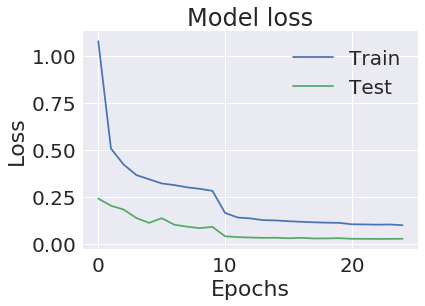

In [21]:
#Plot Loss values for training and validation
pyplot.plot(datagen_lenet_model_history.history['loss'])
pyplot.plot(datagen_lenet_model_history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.show()

**LENET-5 MODEL - TESTING THE MODEL**

We will now be testing the Lenet-5 model on the test dataset. 

We print the performance of the model using the show_models_performance function that we implemented.

Since, our dataset is imbalanced, accuracy is not the best metric to use for finding out how our model is performing. We will see the performance of our model using precision, recall and F-beta score. We will use the weighted average version of the method precision_recall_fscore_support.

We print out the classification report for the model.

Confusion matrix is calculated using the confusion_matrix method of sklearn.metrics. We use matplotlib and seaborn modules to plot the confusion matrix.

12576/12630 [============================>.] - ETA: 0s
Lenet Model accuracy for the test dataset: 0.9426761678543151

When Average is micro - Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision: 0.9426761678543151
recall: 0.9426761678543151
fscore: 0.9426761678543151
support: None

When Average is macro - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision: 0.9118074714627287
recall: 0.9244574178770337
fscore: 0.9140043556522633
support: None

When Average is weighted - Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
precision: 0.9462952742817614
recall: 0.9426761678543151
fscore: 0.9426501460331946
support: None

Classification Report
             precision   

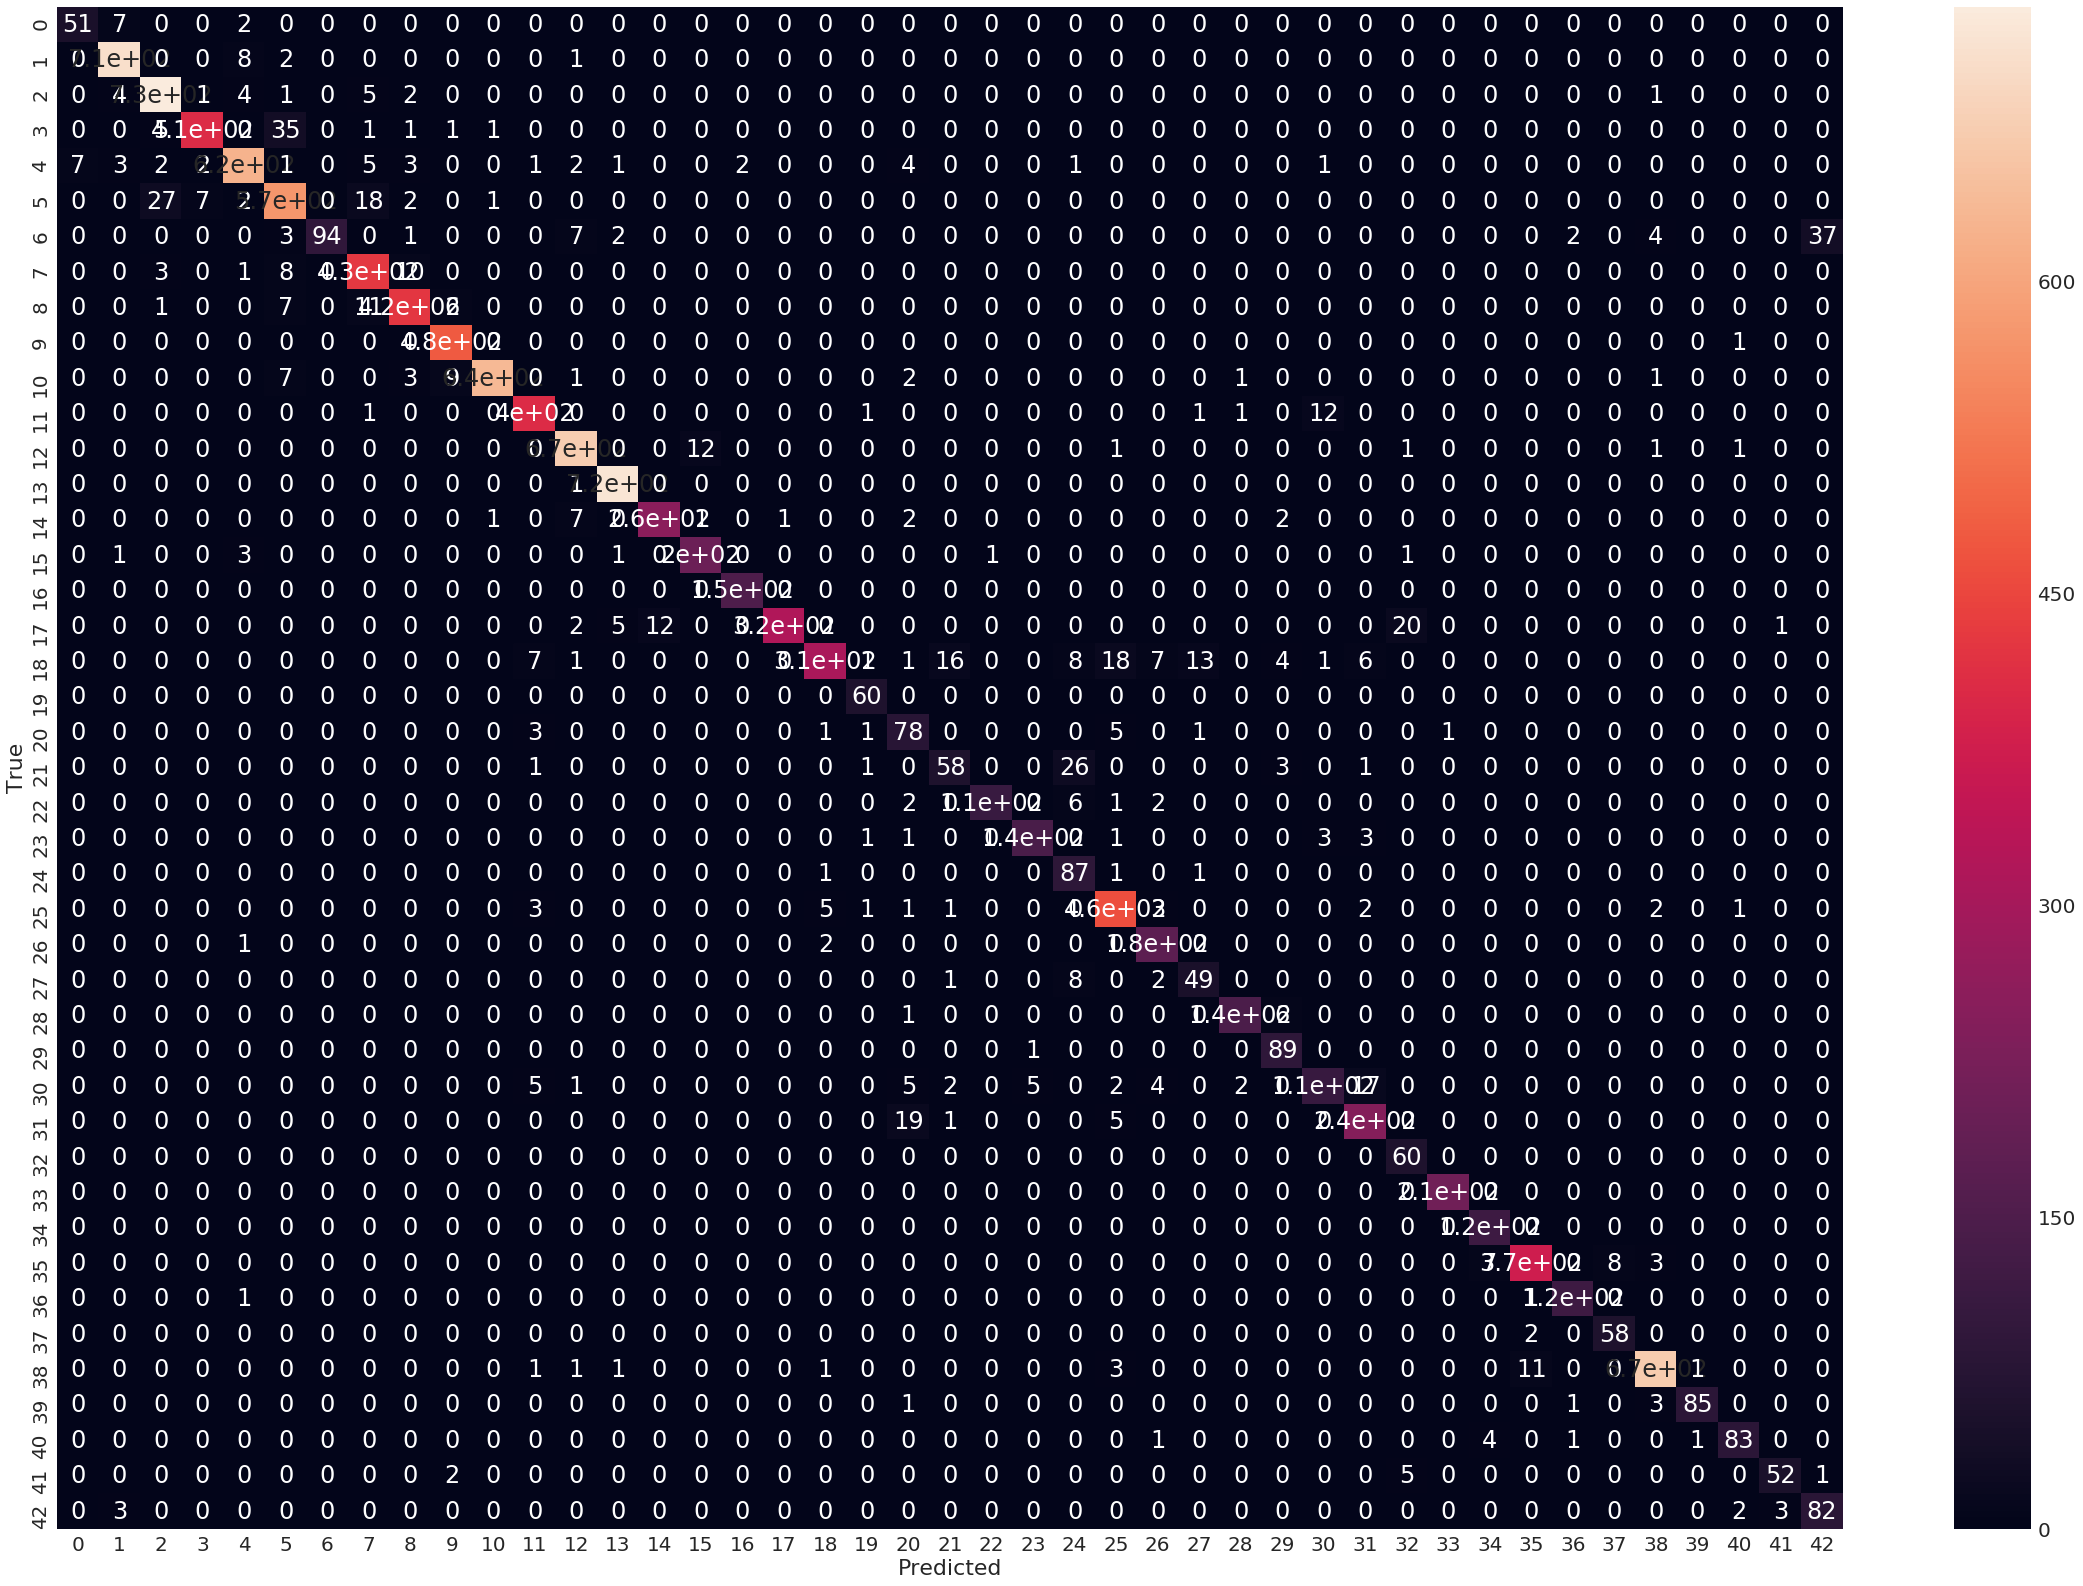

In [15]:
datagen_lenet_y_pred = datagen_lenet_model.predict_classes(test_images)
datagen_lenet_test_accuracy = np.sum(datagen_lenet_y_pred == test_labels)/np.size(datagen_lenet_y_pred)
show_models_performance(test_labels, datagen_lenet_y_pred, TOTAL_CLASSES)

**LENET-5 MODEL PERFORMANCE FOR IMAGES FROM THE WEB**

Now, let's see how our Lenet-5 model performs on randomly selected images from the web.

Our detect_image_type_lenet_model prints out the prediction for the input image.

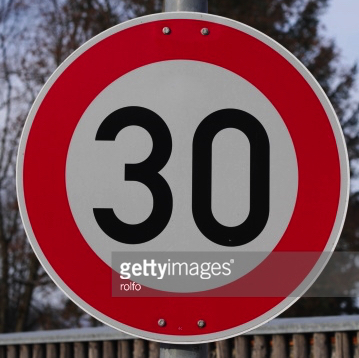

The predicted traffic sign is ”Speed Limit 30”


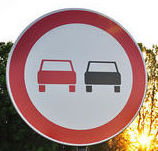

The predicted traffic sign is ”No Passing”


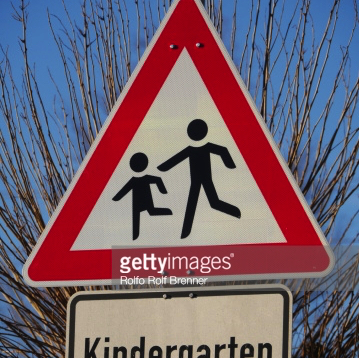

The predicted traffic sign is ”Watch for Children”


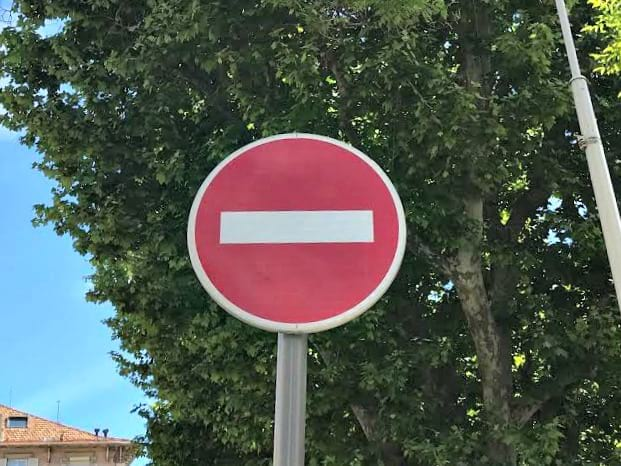

The predicted traffic sign is ”No Passing”


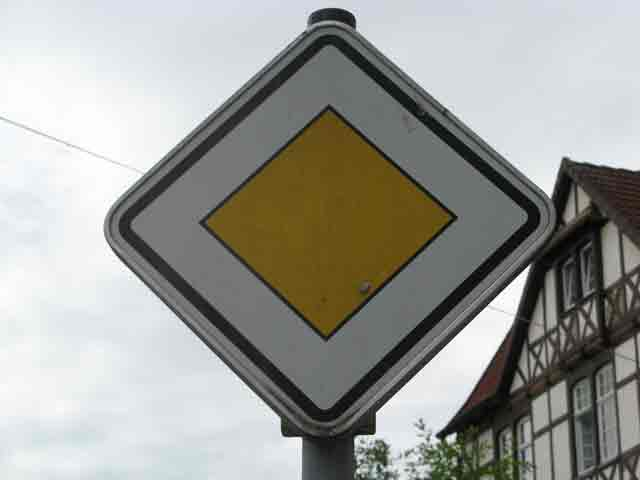

The predicted traffic sign is ”Priority Road”


The predicted traffic sign is ”Do Not Enter”


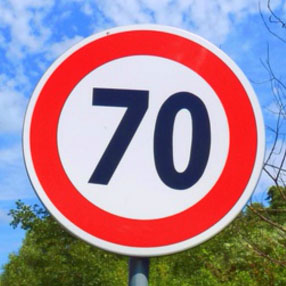

The predicted traffic sign is ”Speed Limit 70”


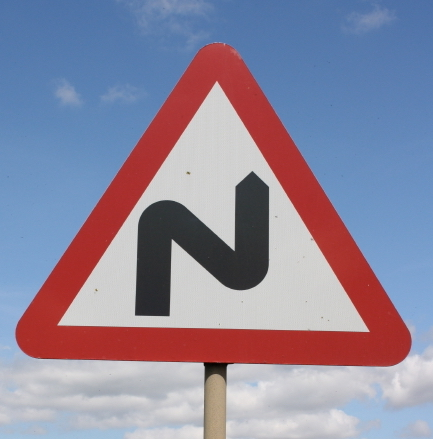

The predicted traffic sign is ”Beware of ice/snow”


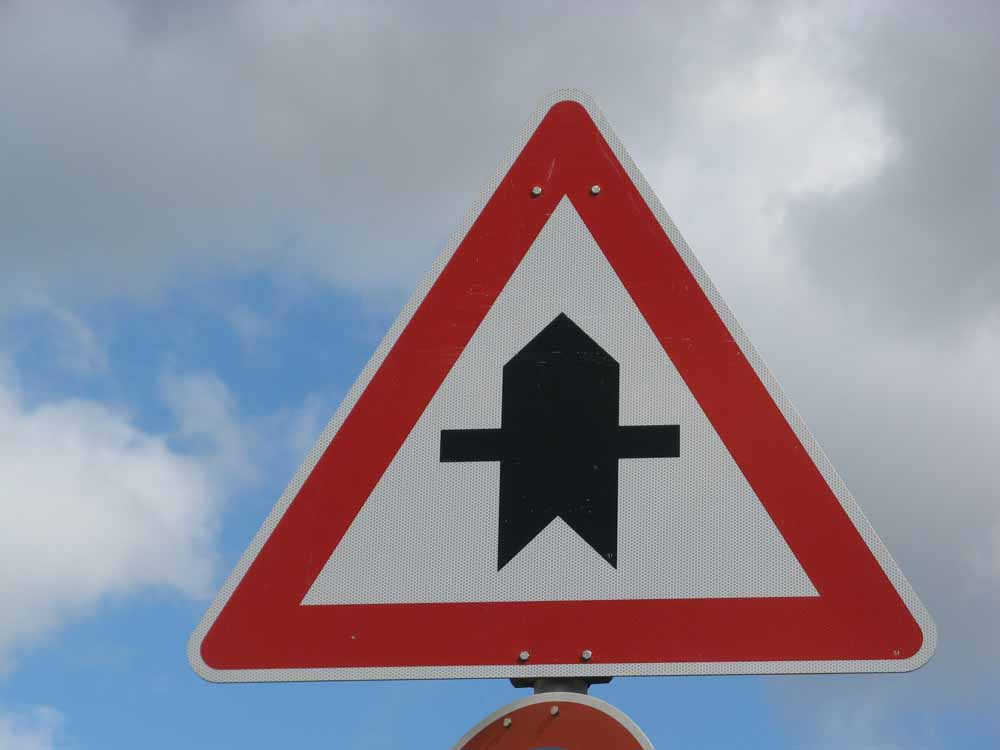

The predicted traffic sign is ”Priority”


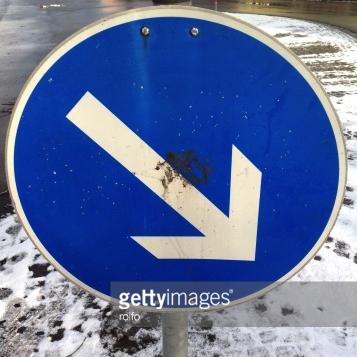

The predicted traffic sign is ”Pass by on right”


The predicted traffic sign is ”Road Work”


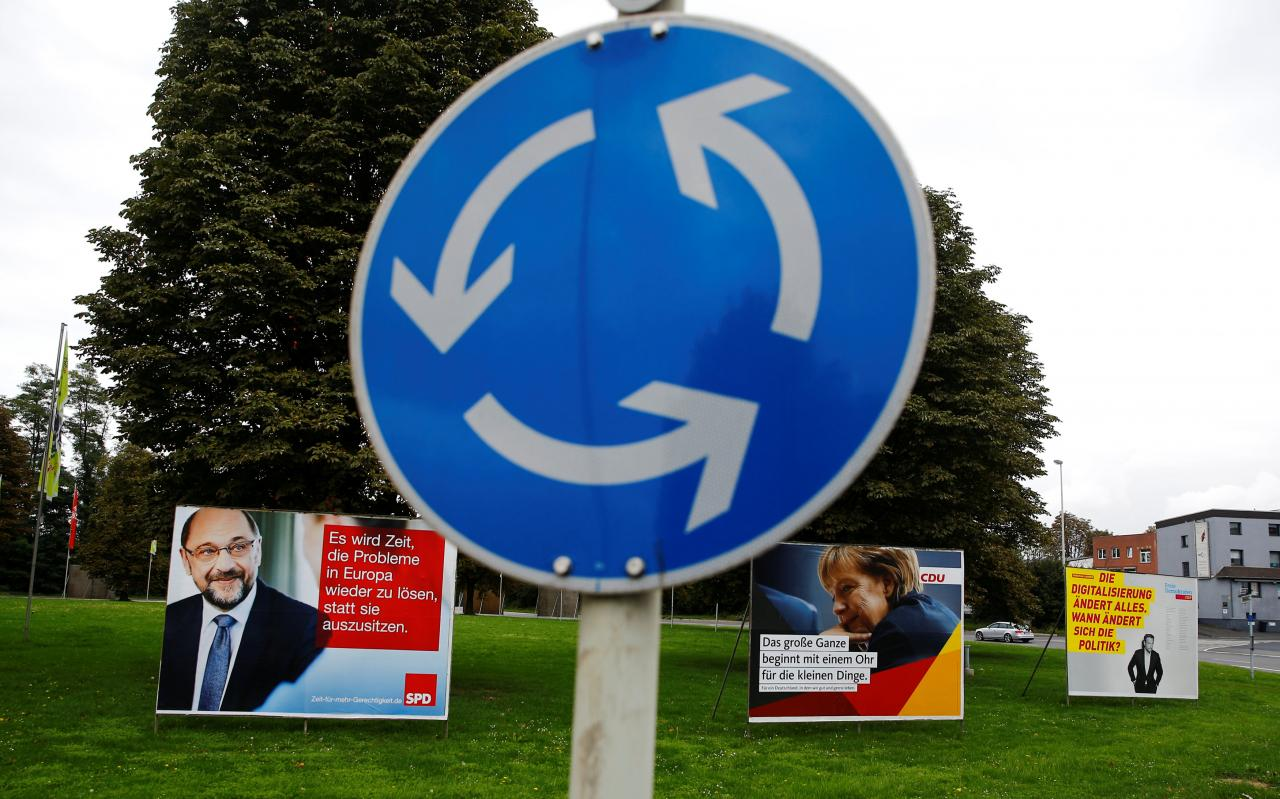

The predicted traffic sign is ”Roundabout”


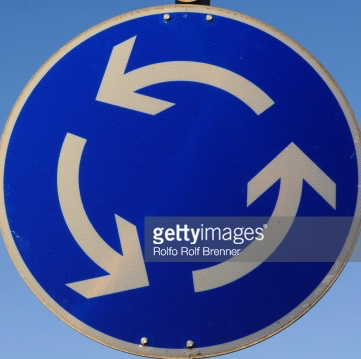

The predicted traffic sign is ”Roundabout”


The predicted traffic sign is ”Traffic signals ahead”


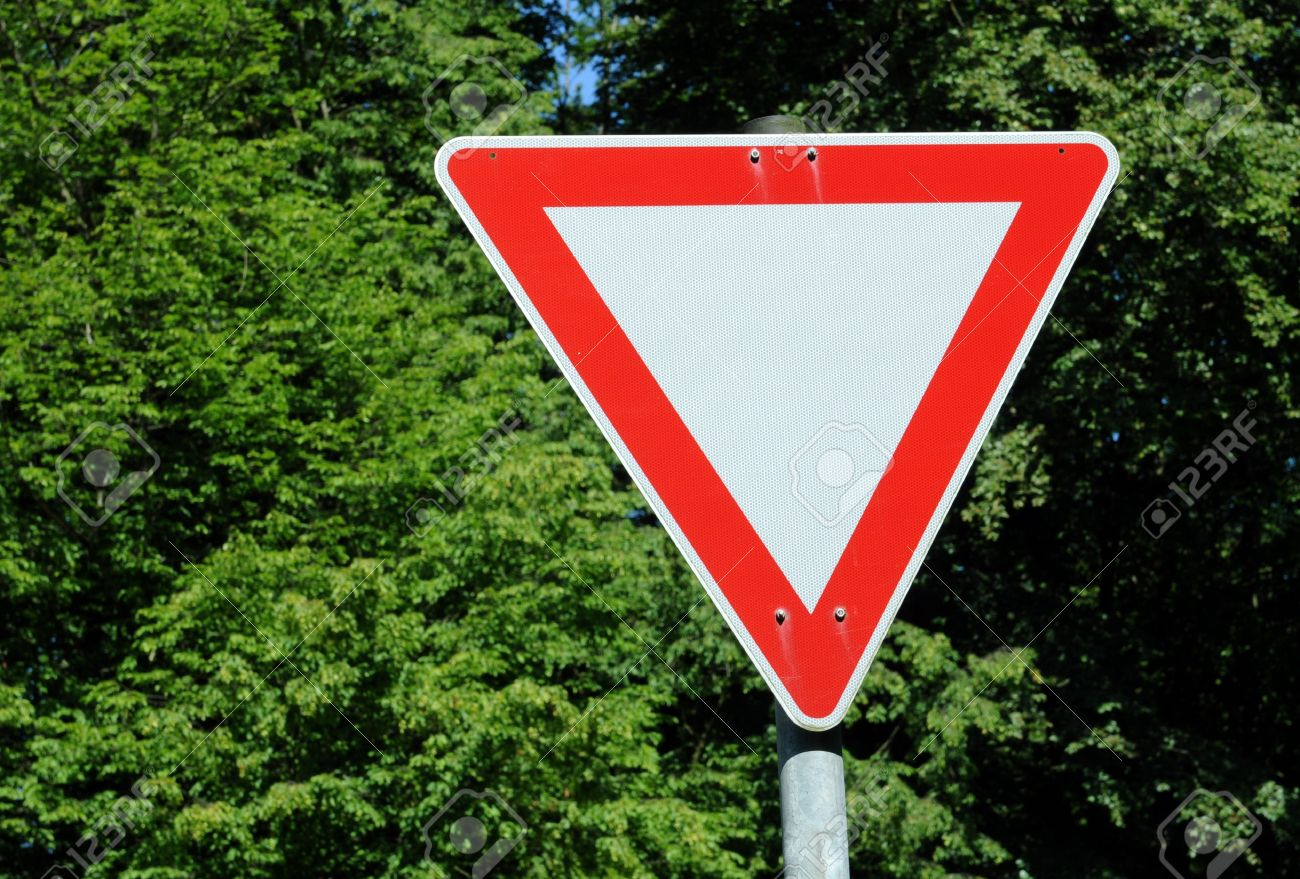

The predicted traffic sign is ”Yield”


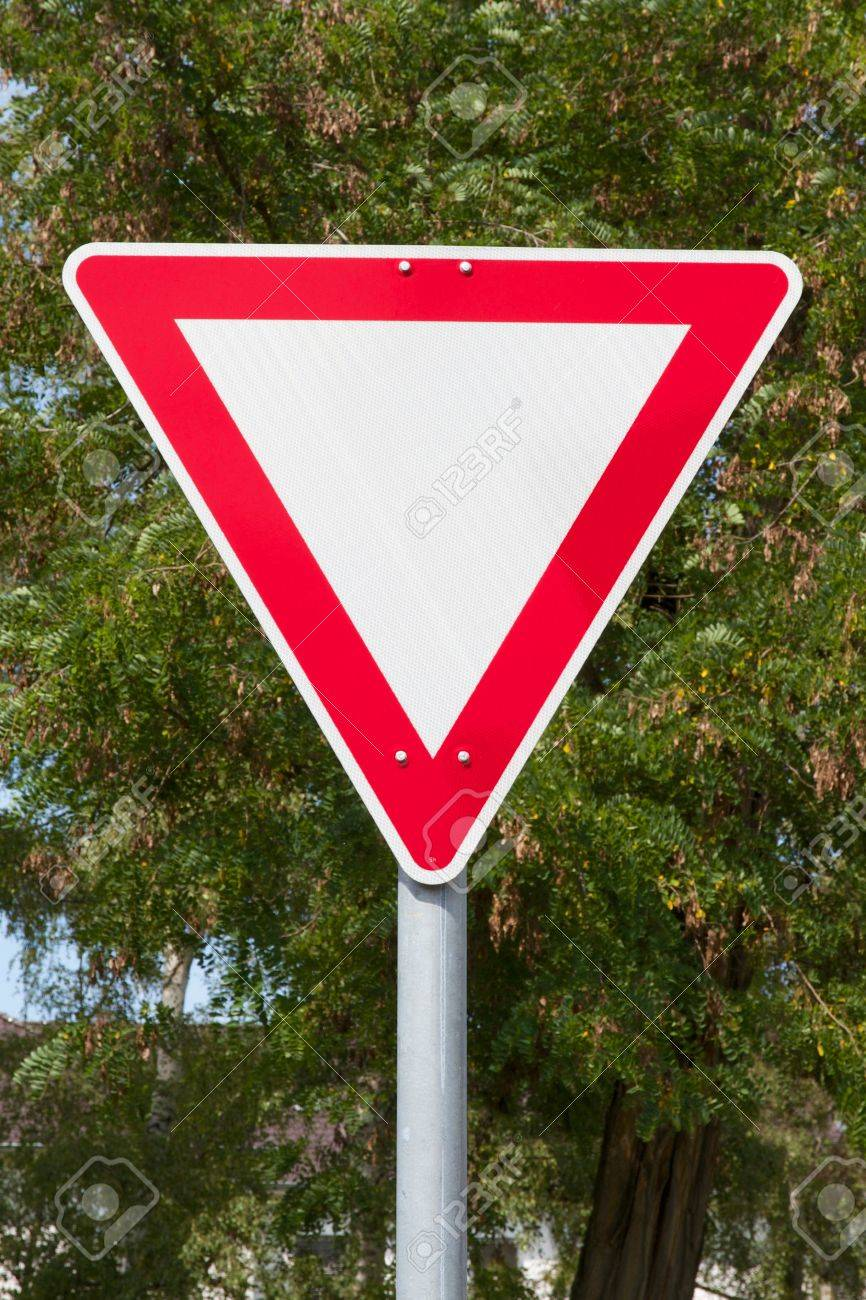

The predicted traffic sign is ”Yield”


In [16]:
img_list = sorted(glob.glob("./test_traffic_sign_images/*"))
    
for img_path in img_list:
    display_img = Image(img_path, width=175, height=175)
    display(display_img)
    detect_image_type_lenet_model(datagen_lenet_model, img_path, class_labels_list, IMAGE_SIZE)

You can see that the Lenet-5 model performed better on the images picked up from the web. It correctly classifies 14 out of 16 images that we provide. It correctly classifies 87.50% of the images we provide.

**LENET-5 MODIFIED MODEL - COMPILE AND FIT THE MODEL**

We are now trying out the Lenet-5 modified model for the dataset.

Each filter in CNN is a feature map. Increasing the filters helps in capturing more detailed features of the dataset. We have modified it by increasing the number of filters in the first and the second convolutional layers.
1st convolutional layer - Number of filters increased from 6 to 12
2nd convolutional layer - Number of filters increased from 16 to 32

We also added a dropout layer after the flatten layer. Dropout is a regularization technique. It helps avoid overfitting by ignoring randomly selected neurons when the model is getting trained. This helps in building a network which generalizes better. 

We will be using the ImageDataGenerator method to do data augmentation.

We print out the summary of the Lenet-5 model.

We will be training it for only 30 epochs, as we have noticed that the validation loss does not improve after that. So, we stop the training after 30 epochs else the model will start overfitting.

You can notice that we have used the train set and validation set which we created in the above code cell using StratifiedShuffleSplit.

We will be using the SGD optimizer as it has better generalization than adaptive optimizers. We are using a decreasing learning rate with SGD. The learning rate decreases with every epoch. This helps us take smaller steps towards the solution. As we go closer to the solution, we want to take smaller steps towards it so that we do not jump over the solution. 

In [17]:
lr = 0.01
lenet_sgd_optimizer = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

def learning_rate_scheduler(epoch):
    return lr*(0.1**int(epoch/10))

datagen_modified_lenet = ImageDataGenerator(rotation_range=17,
                                            width_shift_range=0.1,
                                            height_shift_range=0.1,
                                            shear_range=0.3,
                                            zoom_range=0.15,
                                            horizontal_flip=False,
                                            fill_mode='nearest')

datagen_modified_lenet.fit(X_train)
datagen_modified_lenet_model = get_modified_lenet_model(IMAGE_SIZE, TOTAL_CLASSES)
datagen_modified_lenet_model.summary()
datagen_modified_lenet_model.compile(optimizer=lenet_sgd_optimizer, 
                                     loss='categorical_crossentropy', 
                                     metrics=['accuracy'])

datagen_modified_lenet_checkpointer = ModelCheckpoint(filepath='best_lenet_modified_datagen.hdf5',
                                                      verbose=1, 
                                                      save_best_only=True)

datagen_modified_lenet_model_history = datagen_modified_lenet_model.fit_generator(datagen_modified_lenet.flow(X_train, Y_train, batch_size=32),
                            class_weight=class_weights,
                            steps_per_epoch=X_train.shape[0] / 8,
                            epochs=30,
                            validation_data=(X_val, Y_val),
                            callbacks=[LearningRateScheduler(learning_rate_scheduler), datagen_modified_lenet_checkpointer])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 12, 28, 28)        912       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 14, 14)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 10, 10)        9632      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 5, 5)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               96120     
__________

3921/3920 [==============================] - 49s - loss: 0.1932 - acc: 0.9375 - val_loss: 0.0237 - val_acc: 0.9934
Epoch 24/30
3921/3920 [==============================] - 49s - loss: 0.1976 - acc: 0.9365 - val_loss: 0.0242 - val_acc: 0.9932
Epoch 25/30
3921/3920 [==============================] - 49s - loss: 0.1988 - acc: 0.9365 - val_loss: 0.0238 - val_acc: 0.9938
Epoch 26/30
3921/3920 [==============================] - 49s - loss: 0.1957 - acc: 0.9372 - val_loss: 0.0237 - val_acc: 0.9935
Epoch 27/30
3921/3920 [==============================] - 49s - loss: 0.1965 - acc: 0.9368 - val_loss: 0.0239 - val_acc: 0.9935
Epoch 28/30
3921/3920 [==============================] - 49s - loss: 0.1971 - acc: 0.9361 - val_loss: 0.0234 - val_acc: 0.9943
Epoch 29/30
3921/3920 [==============================] - 49s - loss: 0.1926 - acc: 0.9379 - val_loss: 0.0234 - val_acc: 0.9935
Epoch 30/30
3921/3920 [==============================] - 49s - loss: 0.1926 - acc: 0.9379 - val_loss: 0.0235 - val_acc: 0.9

**PLOTTING LOSS VS EPOCHS**

We have displayed a plot of loss on training and validation datasets over training epochs for the Lenet-5 modified model.

In [20]:
#Plot Loss values for training and validation
pyplot.plot(datagen_modified_lenet_model_history.history['loss'])
pyplot.plot(datagen_modified_lenet_model_history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.show()

**LENET-5 MODIFIED MODEL - TESTING THE MODEL**

We will now be testing the Lenet-5 modified model on the test dataset.

We print the performance of the model using the show_models_performance function that we implemented.

Since, our dataset is imbalanced, accuracy is not the best metric to use for finding out how our model is performing. We will see the performance of our model using precision, recall and F-beta score. We will use the weighted average version of the method precision_recall_fscore_support.

We print out the classification report for the model.

Confusion matrix is calculated using the confusion_matrix method of sklearn.metrics. We use matplotlib and seaborn modules to plot the confusion matrix.

12630/12630 [==============================] - 1s     

Lenet Model accuracy for the test dataset: 0.9598574821852731

When Average is micro - Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision: 0.9598574821852731
recall: 0.9598574821852731
fscore: 0.9598574821852731
support: None

When Average is macro - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision: 0.9457347314373249
recall: 0.9400486255309306
fscore: 0.9388324482110373
support: None

When Average is weighted - Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
precision: 0.9623634471864845
recall: 0.9598574821852731
fscore: 0.9596077460914391
support: None

Classification Report
             precision  

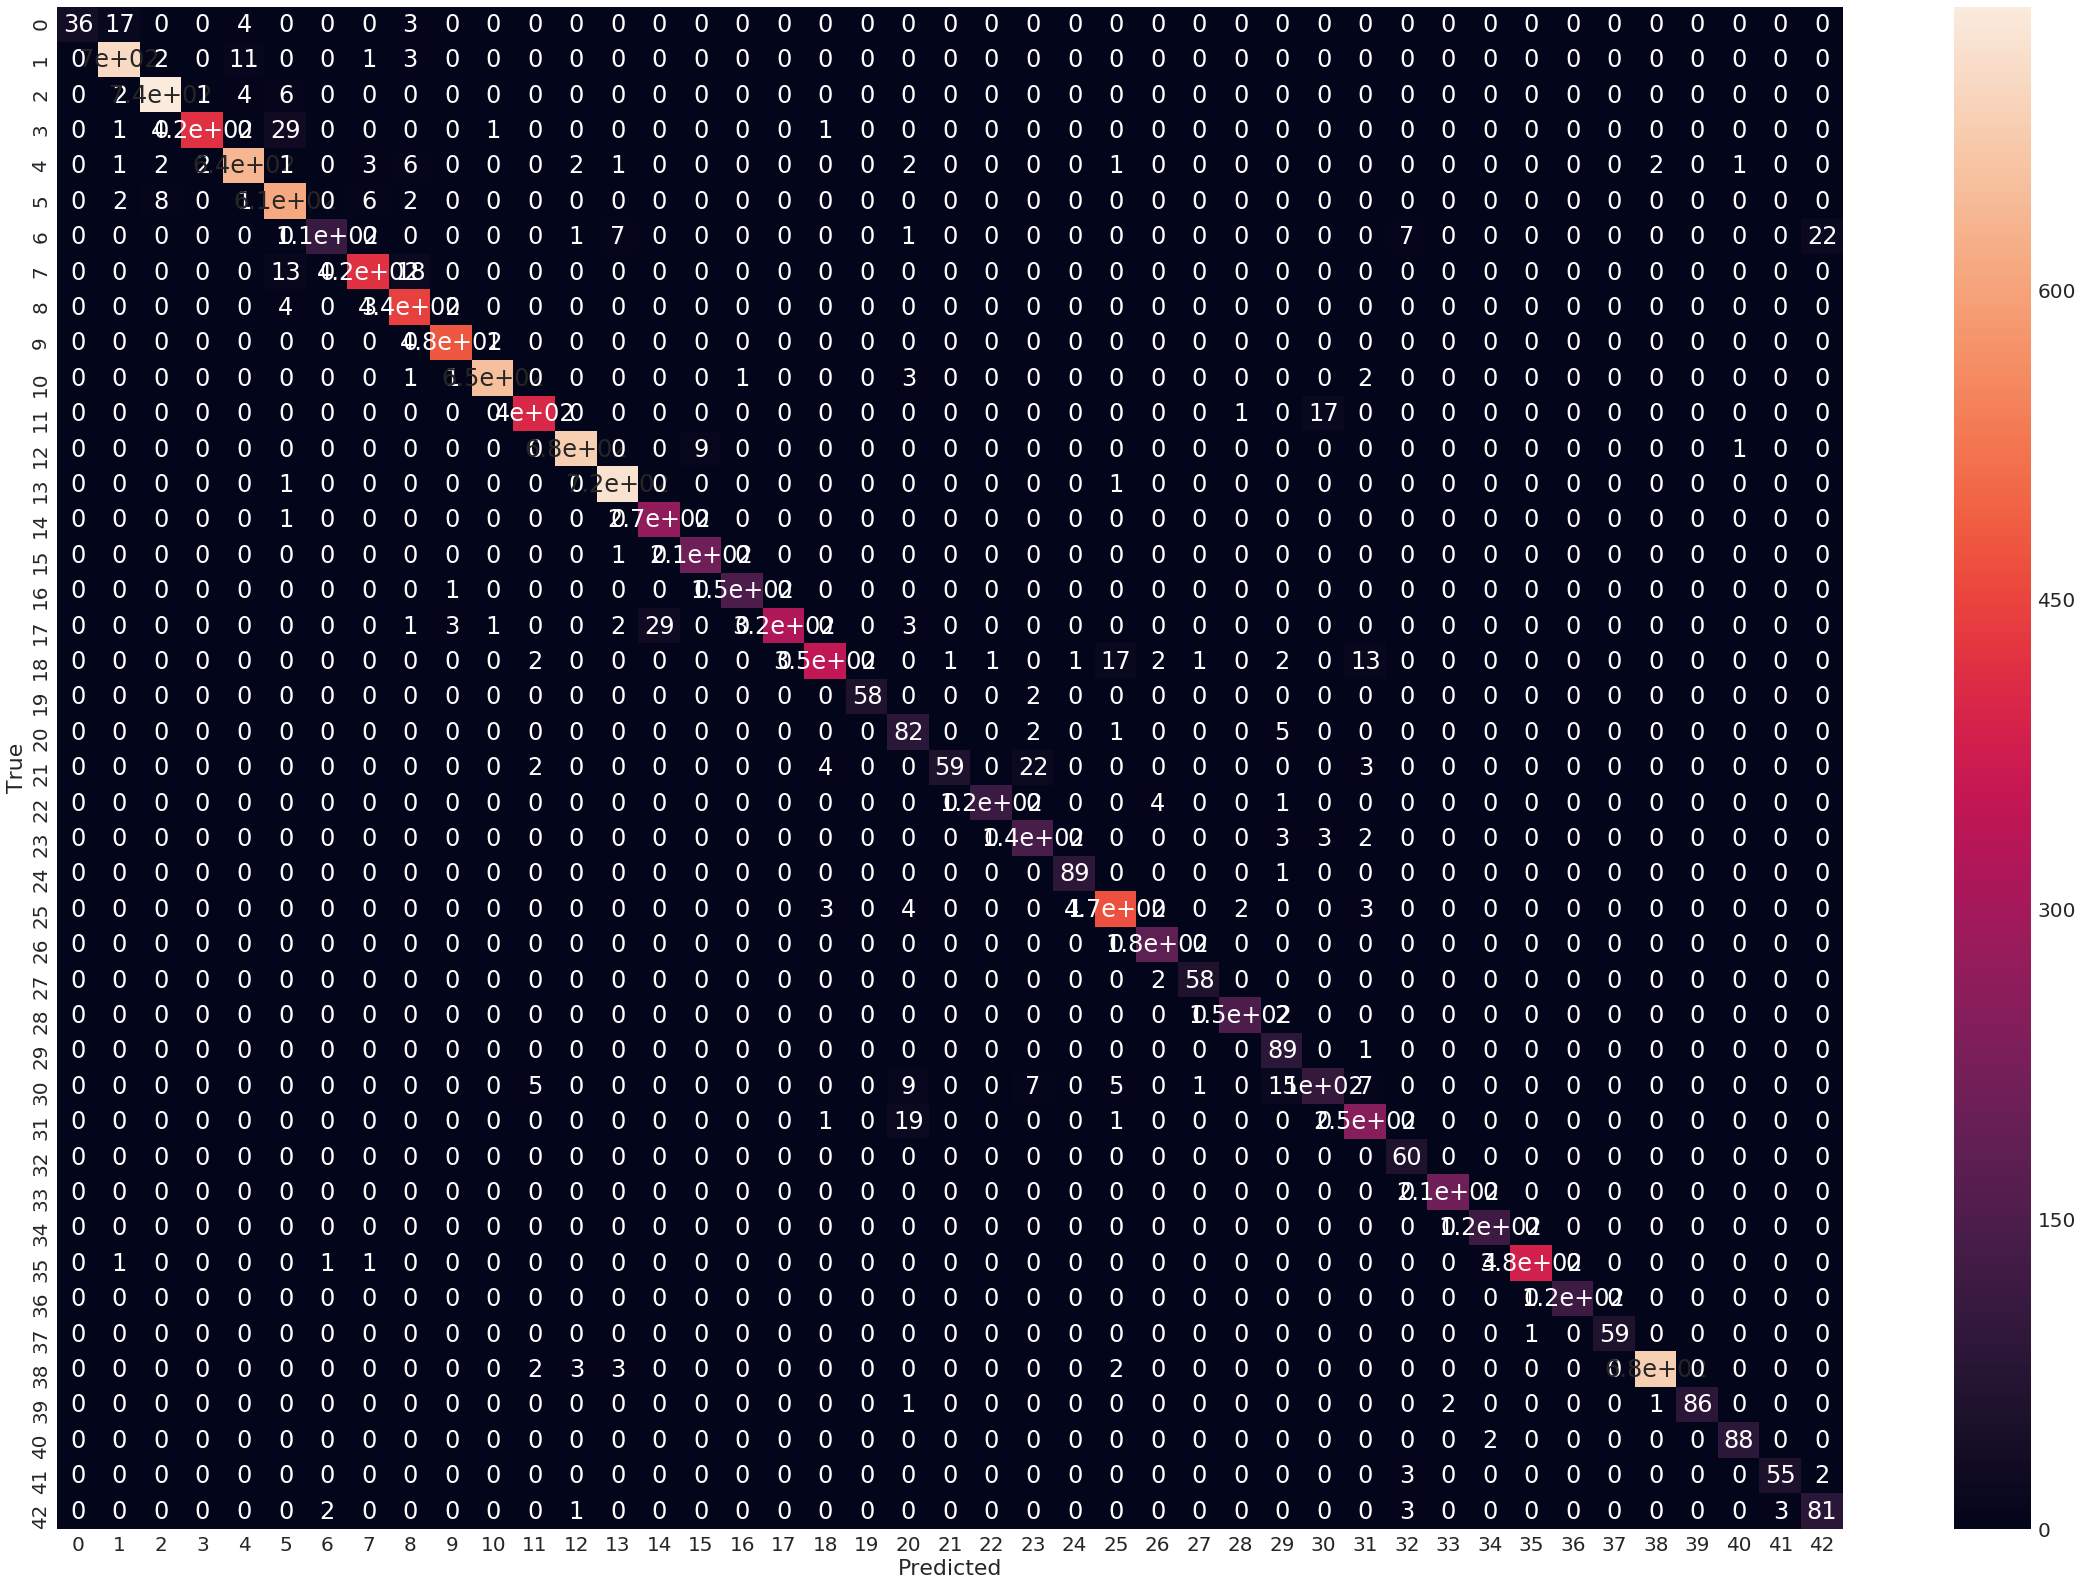

In [18]:
datagen_modified_lenet_y_pred = datagen_modified_lenet_model.predict_classes(test_images)
datagen_modified_lenet_test_accuracy = np.sum(datagen_modified_lenet_y_pred == test_labels)/np.size(datagen_modified_lenet_y_pred)
show_models_performance(test_labels, datagen_modified_lenet_y_pred, TOTAL_CLASSES)

**LENET-5 MODIFIED MODEL PERFORMANCE FOR IMAGES FROM THE WEB**

Now, let's see how our Lenet-5 modified model performs on randomly selected images from the web.

Our detect_image_type_lenet_model prints out the prediction for the input image.

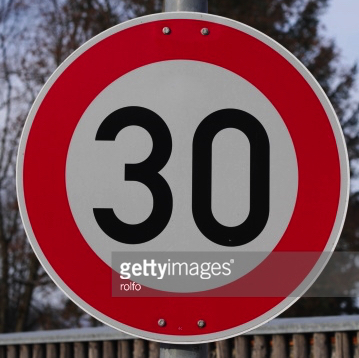

The predicted traffic sign is ”Speed Limit 30”


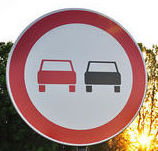

The predicted traffic sign is ”No Passing”


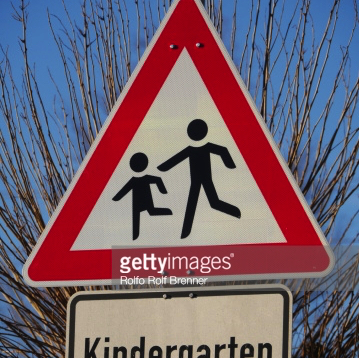

The predicted traffic sign is ”Watch for Children”


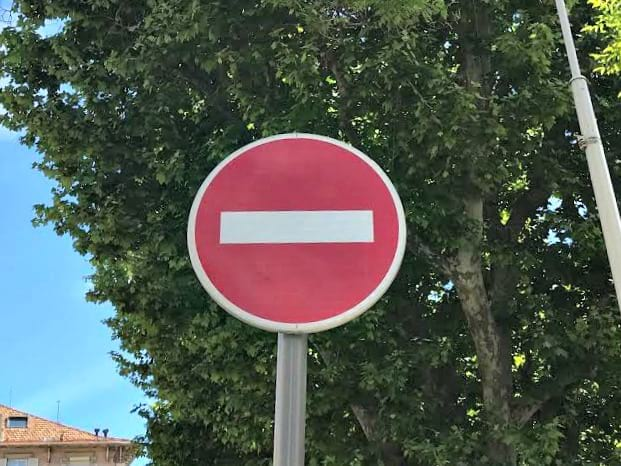

The predicted traffic sign is ”Do Not Enter”


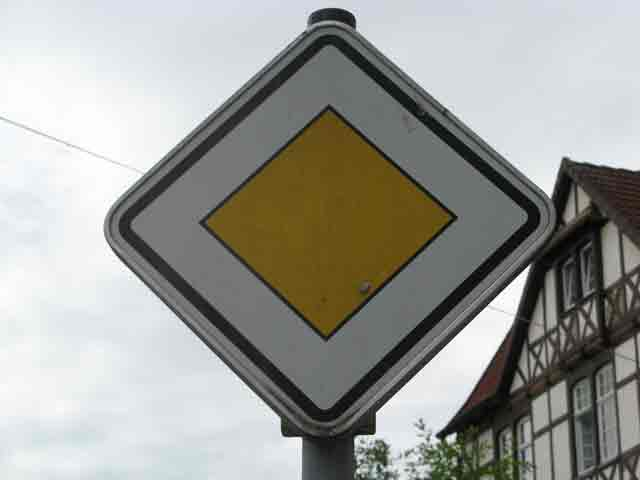

The predicted traffic sign is ”Priority Road”


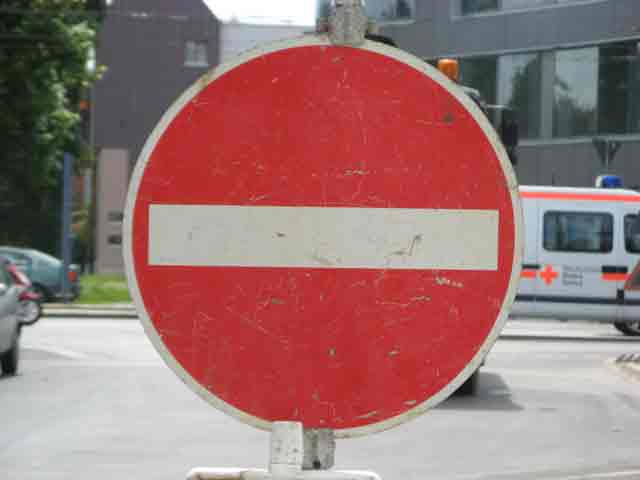

The predicted traffic sign is ”Do Not Enter”


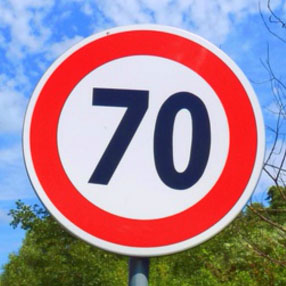

The predicted traffic sign is ”Speed Limit 70”


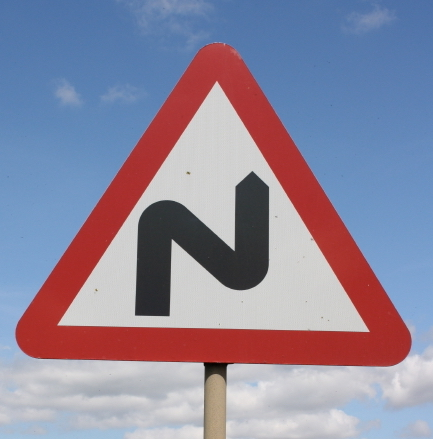

The predicted traffic sign is ”Watch for Children”


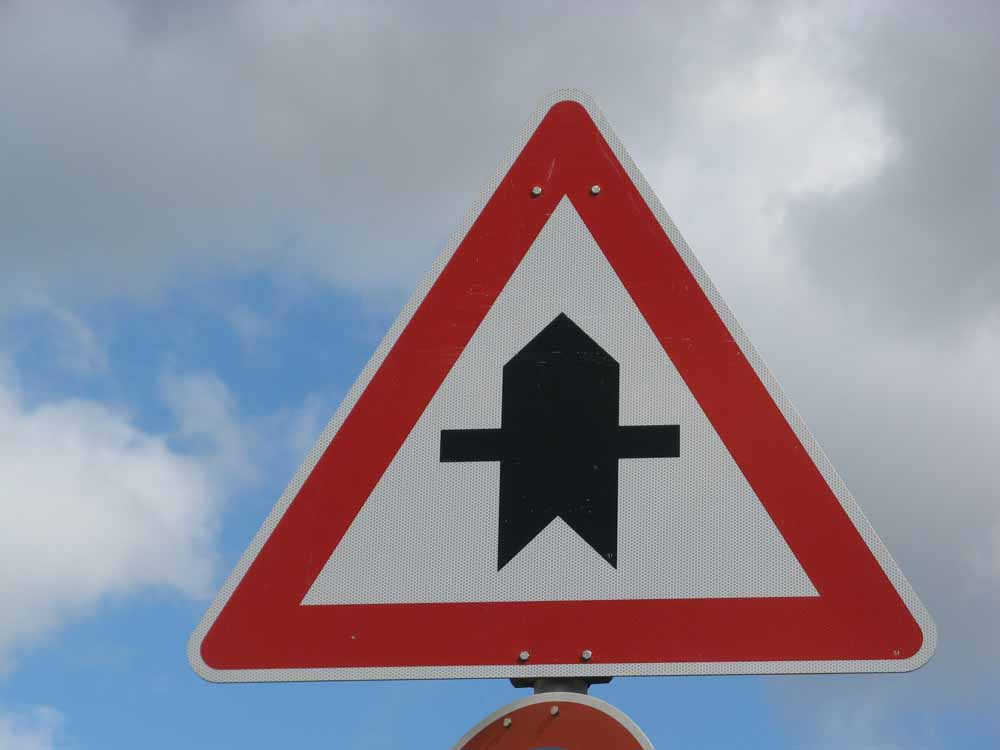

The predicted traffic sign is ”Priority”


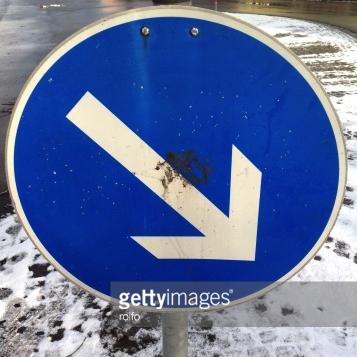

The predicted traffic sign is ”Pass by on right”


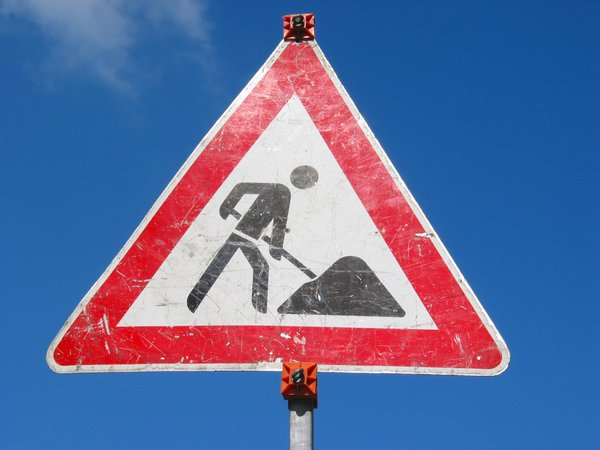

The predicted traffic sign is ”Road Work”


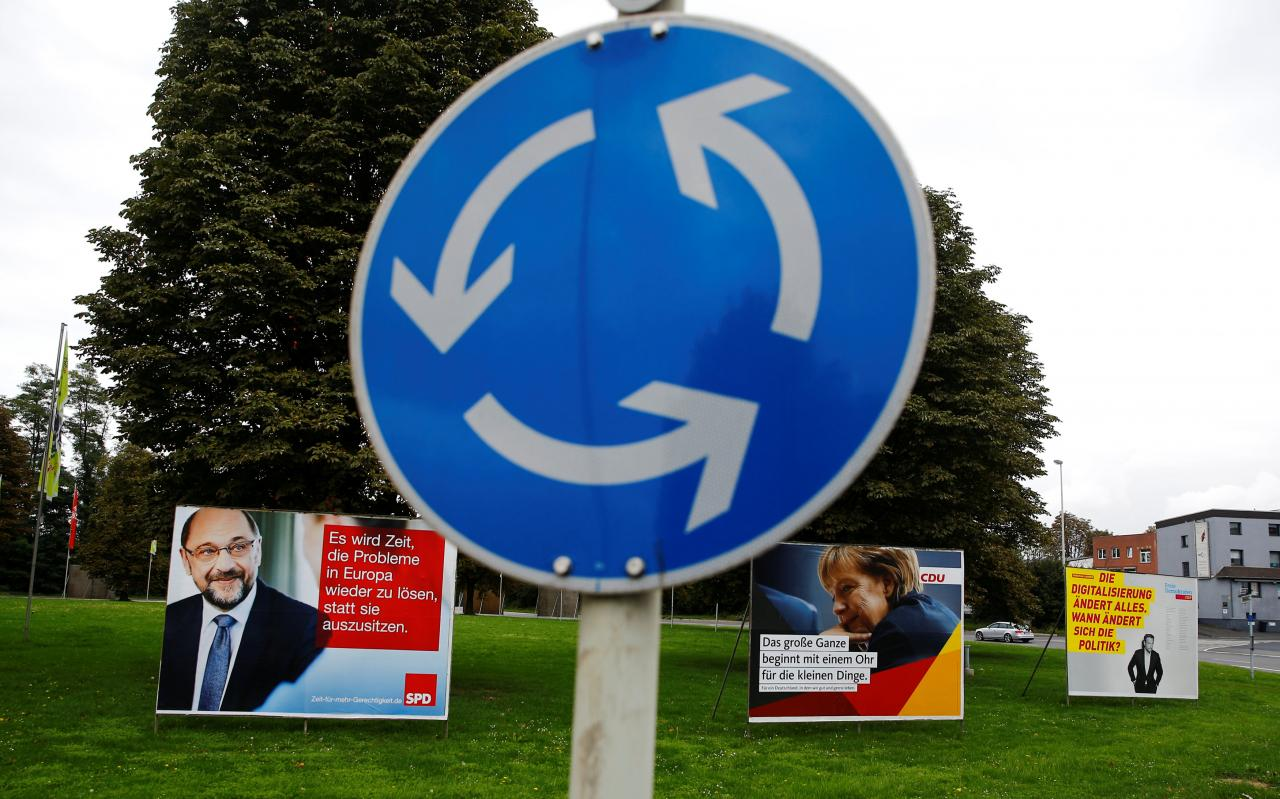

The predicted traffic sign is ”Roundabout”


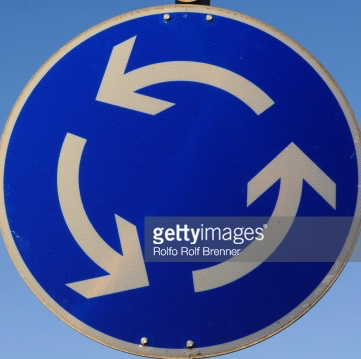

The predicted traffic sign is ”Roundabout”


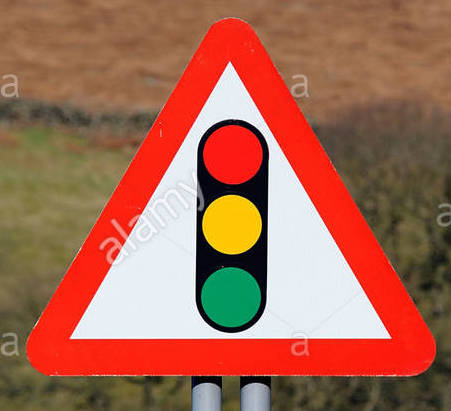

The predicted traffic sign is ”Traffic signals ahead”


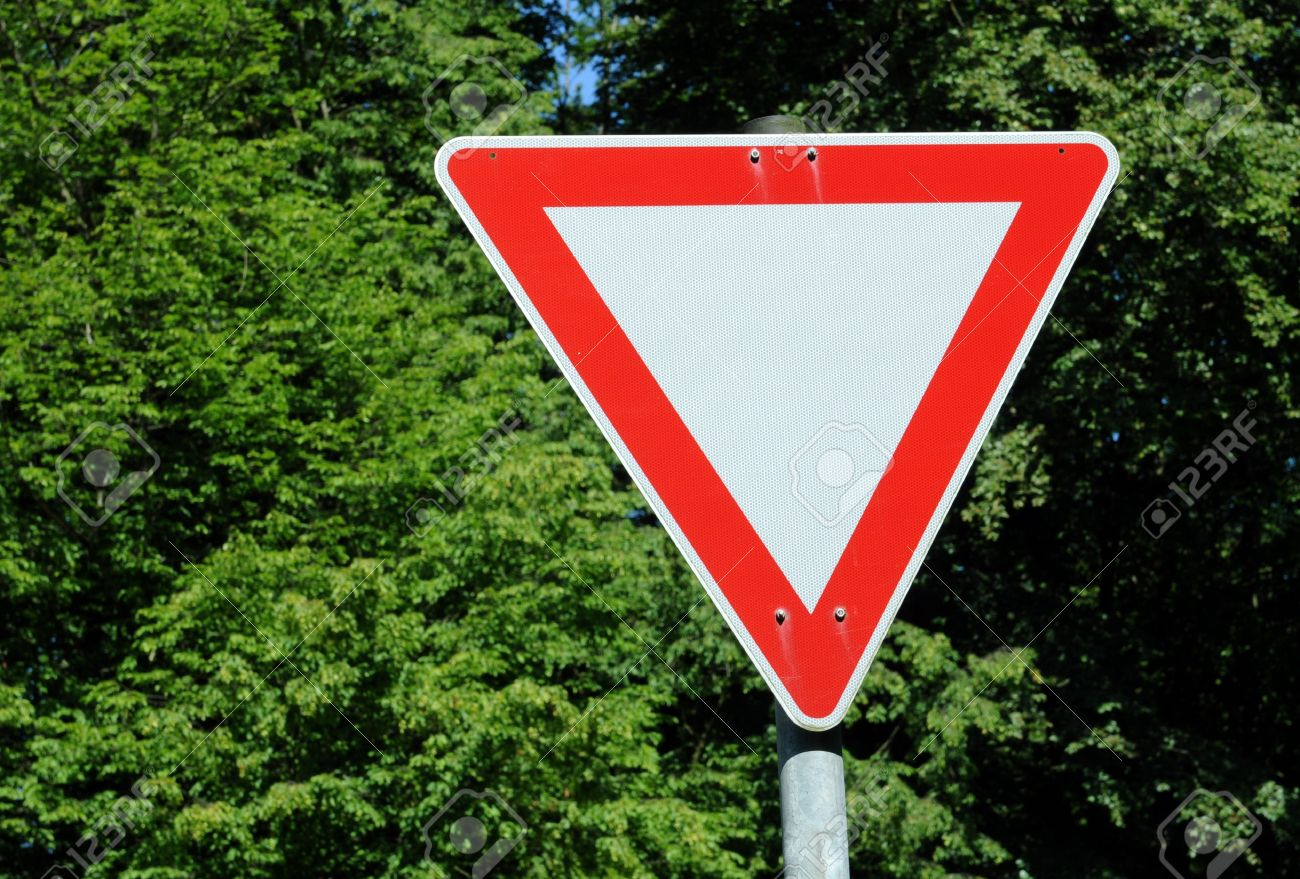

The predicted traffic sign is ”Yield”


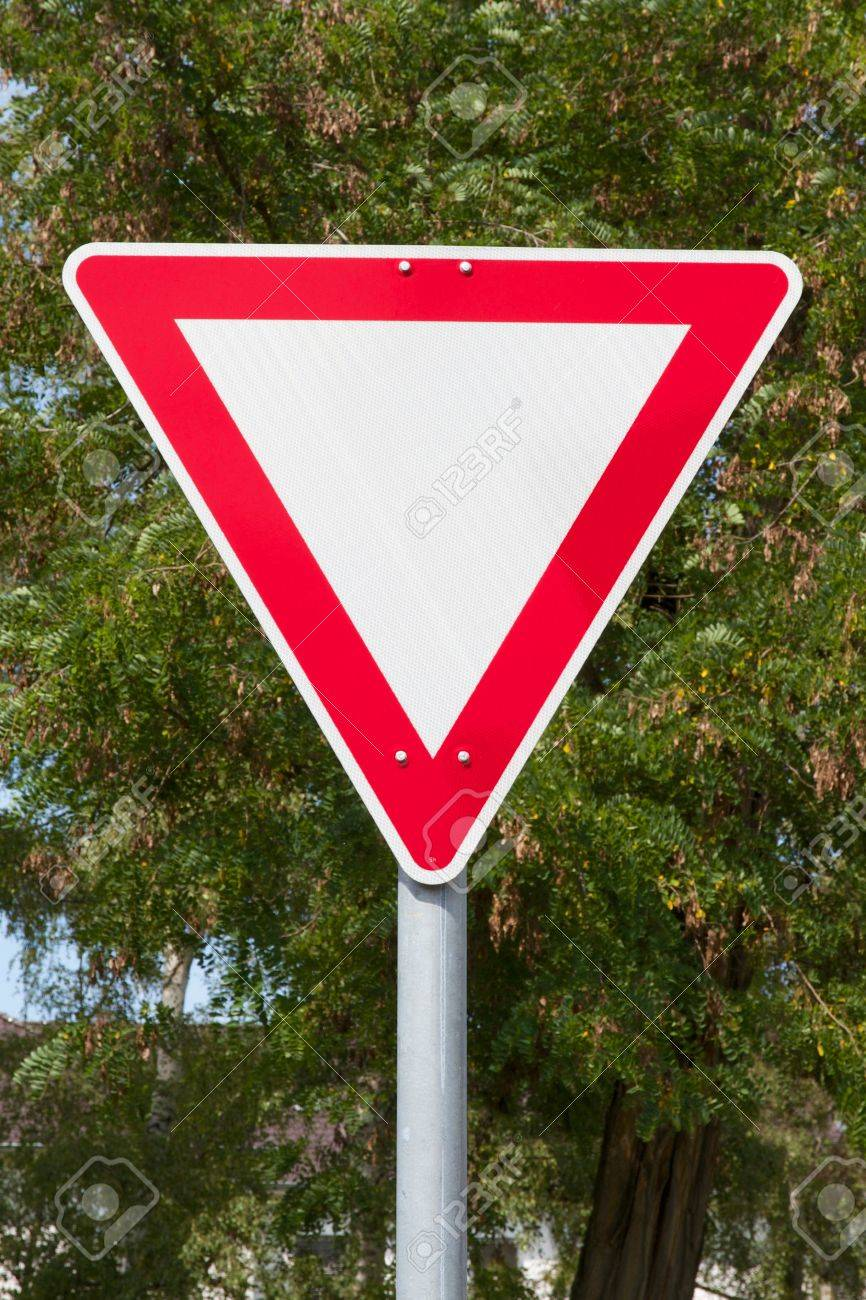

The predicted traffic sign is ”Yield”


In [19]:
img_list = sorted(glob.glob("./test_traffic_sign_images/*"))
    
for img_path in img_list:
    display_img = Image(img_path, width=175, height=175)
    display(display_img)
    detect_image_type_lenet_model(datagen_modified_lenet_model, img_path, class_labels_list, IMAGE_SIZE)

You can see that the Lenet-5 modified model performed better than Lenet-5 model on the images picked up from the web. It correctly classifies 15 out of 16 images that we provide. It correctly classifies 93.75% of the images we provide.